In [1]:
#============== NUMBA AND NUMPY ==============
import sys
import os
import numpy as np
from numpy import linalg as LA
import scipy.constants
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import matplotlib.gridspec as gridspec

import SolverCQWs2 as solver
from IPython.display import display, Math
from tabulate import tabulate

q = 1.602176e-19 #C
kb = 1.3806504e-23 #J/K
nii = 0.0
hbar = 1.054588757e-34
m_e= 9.1093826E-31 #kg
pi=np.pi
eps0= 8.8541878176e-12 #F/m
J2meV=1e3/q
from thomas_solve  import TDMA
#matplotlib options
#plt.rcParams['font.family']         = 'Times New Roman'
#plt.rcParams['font.serif']          = 'Times'
plt.rcParams['xtick.labelsize']     = 20
plt.rcParams['ytick.labelsize']     = 20
plt.rcParams['axes.linewidth']      = 2
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["xtick.major.size"]    =  10
plt.rcParams["xtick.minor.size"]    =  5
plt.rcParams["xtick.major.width"]   =  2
plt.rcParams["xtick.minor.width"]   =  2
plt.rcParams["xtick.direction"]     =  'in'
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams["ytick.major.size"]    =  10
plt.rcParams["ytick.minor.size"]    =  5
plt.rcParams["ytick.major.width"]   =  2

plt.rcParams["ytick.minor.width"]   =  2
plt.rcParams["ytick.direction"]     =  'in'
plt.rcParams['text.usetex']         = True
plt.rcParams['legend.frameon']      = False

import platform
if platform.system() == 'Linux':
    newpath = os.getcwd() + '/DATA'
    
elif  platform.system() == 'Windows':
    newpath = os.getcwd() + '\\DATA'
    
if not os.path.exists(newpath):
    os.makedirs(newpath)





mpl.rcParams['font.size'] = 13


# Correct Biniding Energy

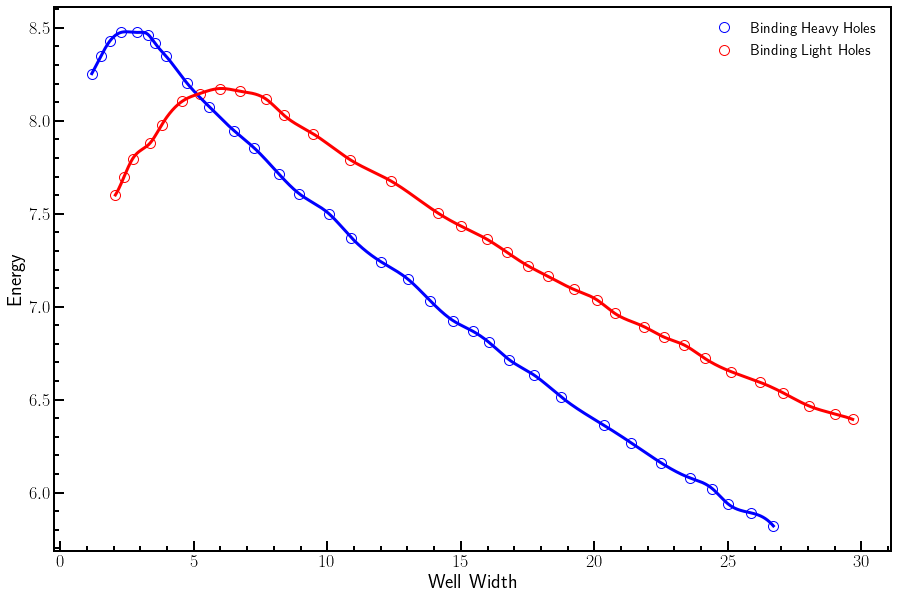

In [2]:
from scipy.interpolate import interp1d
import glob as gb
files = gb.glob('BINDING/*')
files

bhh = np.genfromtxt(files[0],delimiter=',')
blh = np.genfromtxt(files[-2],delimiter=',')


fhh= interp1d(bhh[:,0]/10, bhh[:,1],kind='cubic')
flh= interp1d(blh[:,0]/10, blh[:,1],kind='cubic')
ndat = round(((bhh[-1,0]/10)-(bhh[0,0]/10))/0.002) 
ndatlh = round(((blh[-1,0]/10)-(blh[0,0]/10))/0.002) 

xnew = np.linspace(bhh[0,0]/10,bhh[-1,0]/10,int(ndat))
xnewlh = np.linspace(blh[0,0]/10,blh[-1,0]/10,int(ndatlh))


fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(bhh[:,0]/10,bhh[:,1],'o',mfc='w',ms=10,lw=3,c='b',label='Binding Heavy Holes')
ax.plot(blh[:,0]/10,blh[:,1],'o',mfc='w',ms=10,lw=3,c='r',label='Binding Light Holes')
ax.plot(xnew,fhh(xnew),'-b',lw=3)
ax.plot(xnewlh,flh(xnewlh),'-r',lw=3)
ax.legend(fontsize=15)
ax.set_ylabel('Energy',fontsize=20)
ax.set_xlabel('Well Width',fontsize=20)
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis='y', labelsize=18)

plt.show()

In [3]:
print('Energy binding hh to well widht 23.74nm : %.1f'%fhh(23.74))
print('Energy binding lh to well widht 23.74nm : %.1f'%flh(23.74))
print('Energy binding hh to well widht 11.87nm : %.1f'%fhh(11.87))
print('Energy binding lh to well widht 11.87nm : %.1f'%flh(11.87))
print('Energy binding hh to well widht 13.85nm : %.1f'%fhh(13.85))
print('Energy binding lh to well widht 13.85nm : %.1f'%flh(13.85))
print('Energy binding hh to well widht 10.0nm : %.1f'%fhh(10.0))
print('Energy binding lh to well widht 10.0nm : %.1f'%flh(10.0))

Energy binding hh to well widht 23.74nm : 6.1
Energy binding lh to well widht 23.74nm : 6.8
Energy binding hh to well widht 11.87nm : 7.3
Energy binding lh to well widht 11.87nm : 7.7
Energy binding hh to well widht 13.85nm : 7.0
Energy binding lh to well widht 13.85nm : 7.5
Energy binding hh to well widht 10.0nm : 7.5
Energy binding lh to well widht 10.0nm : 7.9


# M4_3521 & M4_3522

Total layer number: 5
Direct Transitions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|  ELECTRON [eV]  |  HEAVY HOLE [eV]  |  LIGHT HOLE [eV]  |
|-----------------+-------------------+-------------------|
|   E1-> 1.5235   |   HH1->-0.0000    |   LH1->-0.0000    |
|   E2-> 1.5353   |   HH2->-0.0000    |   LH2->-0.0000    |
|   E3-> 1.5458   |   HH3->-0.0000    |   LH3->-0.0001    |


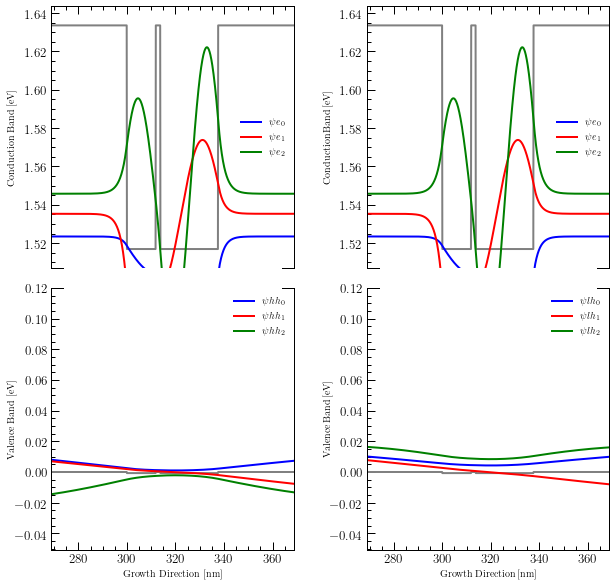

CPU times: user 4.58 s, sys: 1.47 s, total: 6.05 s
Wall time: 6.02 s


In [4]:
%%time


mev = 1e3
class Structure(object): pass
s3 = Structure() # this will be our datastructure

# TEMPERATURE
s3.T = 30.0#Kelvin

# Binding Energy
s3.HHBinding = fhh(23.74)*mev #meV
s3.LHBinding = flh(23.74)*mev #meV

# s3.ThHHBinding = 6.07e-3
# s3.ThLHBinding = 6.76e-3
# s3.naHHBinding = 7.25e-3
# s3.naLHBinding = 7.71e-3



# Band Offset ratios
s3.Qc = 0.65
s3.Qv = 0.35

#s0.scheme = 0



# Total subband number to be calculated for electrons
s3.subbands = 3
# APPLIED ELECTRIC FIELD
s3.Fapp = 0e5 # (V/m)

# For 1D, z-axis is choosen
s3.gridfactor = 0.1#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |


s3.material =[

             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 23.74,'GaAs'  ,      0,   0, 'n','Well'],
             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]

# s2.material =[
#              [ 10 ,'GaAs'  ,      0,   0, 'n','Well'],
#              [ 300, 'AlGaAs',   0.15,   0, 'n','Barrier']
#               ]






structure3 = s3




nm = 1e-9

# RUN SIMULATION
model3 = solver.StructureFrom(structure3) #
sol3 = solver.Solver(model3).QuantumSolutions(absolute =False,Print=True)
solver.Solver(model3).plotting(sol3,amp=1,eymin =-0.01,eymax=0.01,hymin=-0.05,hymax=0.12)
TrArr3 = np.vstack((sol3.TEHH,sol3.TELH))
np.savetxt(newpath+'/Tr-M4_3521.dat',TrArr3,delimiter=',')
solver.Solver(model3).print_result("M4_3521",sol3)

In [95]:
print('Ecperimental H1: %.4f'%1.5181364)
print('Ecperimental L1: %.4f'%1.52064)

Ecperimental H1: 1.5181
Ecperimental L1: 1.5206


In [115]:
# Energies = sol3.Energies
mev = 1e-3
bindingTQWhh = fhh(23.74)*mev
bindingTQWlh = flh(23.74)*mev
bindingnQWhh = fhh(11.87)*mev
bindingnQWlh = flh(11.87)*mev

hh1 = sol3.Ee[0]+sol3.Ehh[0] - bindingTQWhh
lh1 = sol3.Ee[0]+sol3.Elh[0] - bindingTQWlh
hh2 = sol3.Ee[1]+sol3.Ehh[1] - bindingnQWhh
lh2 = sol3.Ee[1]+sol3.Elh[1] - bindingnQWlh
hh3 = sol3.Ee[2]+sol3.Ehh[2] - bindingTQWhh
lh3 = sol3.Ee[2]+sol3.Elh[2] - bindingTQWlh

print(' hh1 : %.4f \n lh1 : %.4f \n hh2 : %.4f \n lh2 : %.4f \n hh3 : %.4f \n lh3 : %.4f \n' %(hh1,lh1,hh2,lh2,hh3,lh3))




 hh1 : 1.5190 
 lh1 : 1.5210 
 hh2 : 1.5330 
 lh2 : 1.5394 
 hh3 : 1.5460 
 lh3 : 1.5587 



In [119]:
print("Delta E: %.1f"%((sol3.Ehh[1]-sol3.Elh[1])*1e3))
print("Delta E: %.1f"%((sol3.Ehh[0]-sol3.Elh[0])*1e3))


Delta E: -6.9
Delta E: -2.8


In [40]:

EgGaAs   = lambda T: 1.519 - (5.405E-4*T**2/(204+T))
EgGaAs(34)

1.5163747142857142

In [67]:
from scipy.integrate import simps
integral = simps(sol3.Psie[:,0]*sol3.Psie[:,0].conjugate(),sol3.xaxis/1e-9)
#ejes = [min(sol3.xaxis),max(sol3.xaxis)/nm]
#print(integral)
#a = np.trapz(sol3.Psilh[:,0]*sol3.Psilh[:,0],ejes)

np.trapz(sol3.Psie[:,0]*sol3.Psie[:,0])

1.0000000000000007

## Export Data

In [71]:
 # Wave Function electron
#arrays to export

fxmin = -430
fxmax = +470
xmin = int(model3.n_max/2+fxmin)
xmax = int(model3.n_max/2 + fxmax)
amp  = 7
print ('To export data, xmin: %d, xmax:%d'%(sol3.xaxis[xmin]/nm,sol3.xaxis[xmax]/nm))
print('Data dimensions to export %d'%sol3.xaxis[xmin:xmax].shape)
Exp_Bands = np.zeros((sol3.xaxis[xmin:xmax].shape[0],3))
Exp_Psie  = np.zeros((sol3.Psie[xmin:xmax,0].shape[0],sol3.Psie.shape[1]+1))
Exp_Psihh = np.zeros((sol3.Psihh[xmin:xmax,0].shape[0],sol3.Psihh.shape[1]+1))
Exp_Psilh = np.zeros((sol3.Psilh[xmin:xmax,0].shape[0],sol3.Psilh.shape[1]+1))

Exp_Bands[:,0] = sol3.xaxis[xmin:xmax]/nm
Exp_Psie[:,0]  = sol3.xaxis[xmin:xmax]/nm
Exp_Psihh[:,0] = sol3.xaxis[xmin:xmax]/nm
Exp_Psilh[:,0] = sol3.xaxis[xmin:xmax]/nm

Exp_Bands[:,1] = sol3.CB[xmin:xmax]
Exp_Bands[:,2] = sol3.VB[xmin:xmax]

for i in range(1,model3.subbands+1):
    Exp_Psie[:,i]  = amp*sol3.Psie[xmin:xmax,i-1]+sol3.Ee[i-1]
    Exp_Psihh[:,i] = amp*sol3.Psihh[xmin:xmax,i-1]-sol3.Ehh[i-1]
    Exp_Psilh[:,i] = amp*sol3.Psilh[xmin:xmax,i-1]-sol3.Elh[i-1]
    
np.savetxt(newpath+'/Bands-M4_3521.txt',Exp_Bands,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/Psi-Electrons-M4_3521.txt',Exp_Psie,delimiter=',',fmt="%s")
np.savetxt(newpath+'/Psi-HeavyHoles-M4_3521.txt',Exp_Psihh,delimiter=',',fmt="%s")
np.savetxt(newpath+'/Psi-LightHoles-M4_3521.txt',Exp_Psilh,delimiter=',',fmt="%s")


Exp_Psie.shape

To export data, xmin: 275, xmax:365
Data dimensions to export 900


(900, 3)

## CQWS with different Well width ($W_{1}$)

In [10]:
datap = []
datae = []
cbs   = []
xa    = []
Delta1 =  []
Delta2 = []
wwidth = []
nm = 1e-9
for i in range(16):
    class Structure(object): pass
    s = Structure() # this will be our datastructure
    # TEMPERATURE
    s.T = 30 #Kelvin

    # Binding Energy
    s.HHBinding =9e-3 #meV
    s.LHBinding =9e-3 #meV

    # Band Offset ratios
    s.Qc = 0.65
    s.Qv = 0.35

#s0.scheme = 0



    # Total subband number to be calculated for electrons
    s.subbands = 2
    # APPLIED ELECTRIC FIELD
    s.Fapp = 0e5 # (V/m)

    # For 1D, z-axis is choosen
    s.gridfactor = 0.1#nm

    s.material =[
                 [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
                 [ i+11.87,   'GaAs'  ,      0,   0, 'n','Well'],
                 [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
                 [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
                 [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],        
                ]
    structure = s
    model = solver.StructureFrom(structure) #
    sol   = solver.Solver(model).QuantumSolutions(absolute =True,Print=False)
   
    datap.append((sol.Psie))    
    datae.append((sol.Ee)) 
    cbs.append((sol.CB)) 
    xa.append((sol.xaxis/nm))
    Delta1.append((sol.Elh[0]-sol.Ehh[0]))
    Delta2.append((sol.Elh[1]-sol.Ehh[1]))
    wwidth.append((i+11.87))









Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5


# M4_3523

Total layer number: 5
Direct Transitions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|  ELECTRON [eV]  |  HEAVY HOLE [eV]  |  LIGHT HOLE [eV]  |
|-----------------+-------------------+-------------------|
|   E1-> 1.5327   |   HH1->-0.0047    |   LH1->-0.0097    |
|   E2-> 1.5412   |   HH2->-0.0055    |   LH2->-0.0164    |
|   E3-> 1.5843   |   HH3->-0.0185    |   LH3->-0.0431    |


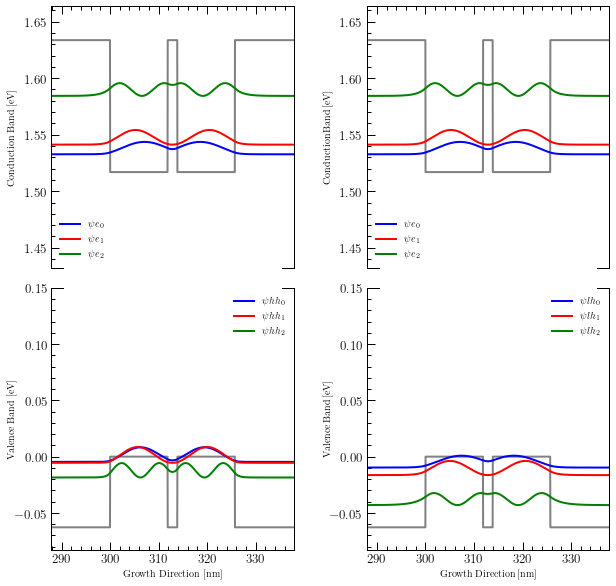

CPU times: user 10.6 s, sys: 1.19 s, total: 11.8 s
Wall time: 3.9 s


In [91]:
%%time



class Structure(object): pass
s4 = Structure() # this will be our datastructure

# TEMPERATURE
s4.T = 30#Kelvin
# Binding Energy
s4.HHBinding =fhh(11.87)*mev #meV
s4.LHBinding =flh(11.87)*mev#meV

# Band Offset ratios
s4.Qc = 0.65
s4.Qv = 0.35



# Total subband number to be calculated for electrons
s4.subbands = 3
# APPLIED ELECTRIC FIELD
s4.Fapp = 0e5 # (V/m)  ----> KV/cm

# For 1D, z-axis is choosen
s4.gridfactor = 0.02#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |


s4.material =[
             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             #[ 30.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             #[ 20.0,   'GaAs',      0,   0, 'n','Substrate']
             ]




structure4 = s4



nm = 1e-9

# RUN SIMULATION
model4 = solver.StructureFrom(structure4) #
#sol4 = solver.Schrodinger(model4,sparse = True,absolute =False)
sol4 = solver.Solver(model4).QuantumSolutions(absolute = True,Print=True)
TrArr4 = np.vstack((sol4.TEHH,sol4.TELH))
np.savetxt(newpath+'/Tr-M4_3523.dat',TrArr4,delimiter=',')
solver.Solver(model4).plotting(sol4,amp=10,axmin=25,axmax=25,eymin =-0.085,eymax=0.03,hymin=-0.02,hymax=0.15)
solver.Solver(model4).print_result("M4_3523",sol4)

In [69]:
np.arange(1.53,1.55,0.002)
np.arange(-0.018,-0.001,0.002)
np.linspace(-0.017,-0.001,5)
np.linspace(1.53,1.545,5)

array([1.53   , 1.53375, 1.5375 , 1.54125, 1.545  ])

In [75]:
 # Wave Function electron
#arrays to export

fxmin = -750
fxmax = +750
xmin = int(model4.n_max/2+fxmin)
xmax = int(model4.n_max/2 + fxmax)
amp  = 7
print ('To export data, xmin: %d, xmax:%d'%(sol4.xaxis[xmin]/nm,sol4.xaxis[xmax]/nm))
print('Data dimensions to export %d'%sol4.xaxis[xmin:xmax].shape)
Exp_Bands4 = np.zeros((sol4.xaxis[xmin:xmax].shape[0],3))
Exp_Psie4  = np.zeros((sol4.Psie[xmin:xmax,0].shape[0],sol4.Psie.shape[1]+1))
Exp_Psihh4 = np.zeros((sol4.Psihh[xmin:xmax,0].shape[0],sol4.Psihh.shape[1]+1))
Exp_Psilh4 = np.zeros((sol4.Psilh[xmin:xmax,0].shape[0],sol4.Psilh.shape[1]+1))

Exp_Bands4[:,0] = sol4.xaxis[xmin:xmax]/nm
Exp_Psie4[:,0]  = sol4.xaxis[xmin:xmax]/nm
Exp_Psihh4[:,0] = sol4.xaxis[xmin:xmax]/nm
Exp_Psilh4[:,0] = sol4.xaxis[xmin:xmax]/nm

Exp_Bands4[:,1] = sol4.CB[xmin:xmax]
Exp_Bands4[:,2] = sol4.VB[xmin:xmax]

for i in range(1,model4.subbands+1):
    Exp_Psie4[:,i]  = amp*sol4.Psie[xmin:xmax,i-1]+sol4.Ee[i-1]
    Exp_Psihh4[:,i] = amp*sol4.Psihh[xmin:xmax,i-1]-sol4.Ehh[i-1]
    Exp_Psilh4[:,i] = amp*sol4.Psilh[xmin:xmax,i-1]-sol4.Elh[i-1]
    
np.savetxt(newpath+'/Bands-M4_3523.txt',Exp_Bands4,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/Psi-Electrons-M4_3523.txt',Exp_Psie4,delimiter=',',fmt="%s")
np.savetxt(newpath+'/Psi-HeavyHoles-M4_3523.txt',Exp_Psihh4,delimiter=',',fmt="%s")
np.savetxt(newpath+'/Psi-LightHoles-M4_3523.txt',Exp_Psilh4,delimiter=',',fmt="%s")



To export data, xmin: 237, xmax:387
Data dimensions to export 1500


In [58]:
print('Ecperimental H1: %.4f'%1.532778)
print('Ecperimental L1: %.4f'%1.53798)

Ecperimental H1: 1.5328
Ecperimental L1: 1.5380


# Calculate $\Delta E $ 

# CQWS

Total layer number: 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

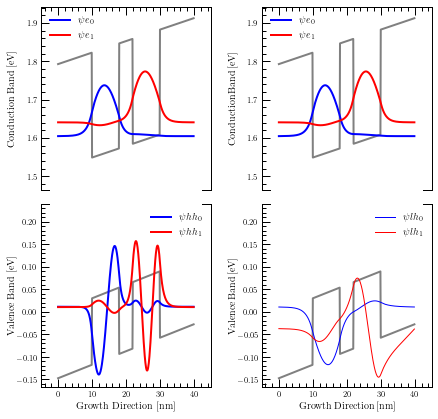

CPU times: user 1.66 s, sys: 859 ms, total: 2.52 s
Wall time: 6.01 s


In [4]:
%%time



class Structure(object): pass
s4 = Structure() # this will be our datastructure

# TEMPERATURE
s4.T = 4 #Kelvin
# Binding Energy
s4.Binding =10e-3 #meV

# Band Offset ratios
s4.Qc = 0.65
s4.Qv = 0.35



# Total subband number to be calculated for electrons
s4.subbands = 2
# APPLIED ELECTRIC FIELD
s4.Fapp = 30e5 # (V/m)

# For 1D, z-axis is choosen
s4.gridfactor = 0.1#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |


s4.material =[
             [ 10.0, 'AlGaAs',   0.33,   0, 'n','Barrier'],
             [ 8,'GaAs'  ,      0,   0, 'n','Well'],
             [ 4, 'AlGaAs',   0.33,   0, 'n','Barrier'],
             [ 8,'GaAs'  ,      0,   0, 'n','Well'],
             [ 10.0, 'AlGaAs',   0.33,   0, 'n','Barrier'],
             #[ 30.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             #[ 20.0,   'GaAs',      0,   0, 'n','Substrate']
             ]

# s2.material =[
#              [ 10 ,'GaAs'  ,      0,   0, 'n','Well'],
#              [ 300, 'AlGaAs',   0.15,   0, 'n','Barrier']
#               ]






structure4 = s4



nm = 1e-9

# RUN SIMULATION
model4 = solver.StructureFrom(structure4) #

#sol4 = solver.Schrodinger(model4,sparse = True,absolute =False)
sol4 = solver.Solver(model4).QuantumSolutions(absolute = False)
TrArr4 = np.vstack((sol4.TEHH,sol4.TELH))
np.savetxt(newpath+'/Tr-M4_3523.dat',TrArr4,delimiter=',')


solver.Solver(model4).plotting(sol4,axmin=25,axmax=25,eymin =-0.085,eymax=0.03,hymin=-0.02,hymax=0.15)

In [55]:
from IPython.display import Image,display
from IPython.core.display import HTML
display(Image(url= "https://journals.aps.org/prb/article/10.1103/PhysRevB.85.045207/figures/2/medium",width=500, unconfined=True))


# Sparse Matrix

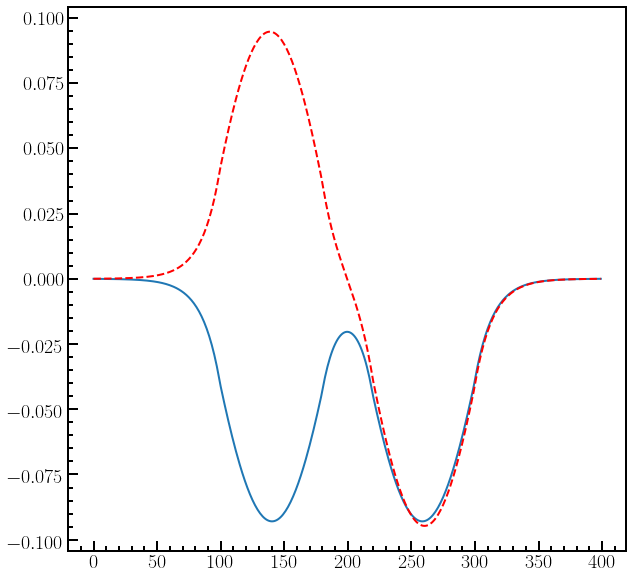

In [25]:
from scipy.sparse import dia_matrix
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs

from numpy import linalg as LA
vpot      = model4.CB
m         = model4.cb_meff
dx        = model4.dx
n         = model4.n_max
subbands  = model4.subbands
xaxis     = np.arange(0,n)*dx 
H         = solver.H(vpot,m,dx,n)

upper     = np.diag(H,k=1)
diagonal  = np.diag(H,k=0)
lower     = np.diag(H,k=-1)

# upper = np.insert(upper ,(0), (upper[0]))
# lower = np.insert(lower ,(0), (lower[0]))
# index  = (-1, 0, 1)
# diagonals = (-lower,diagonal,-upper)
# HH = dia_matrix((diagonals,index),shape=(n,n))
#v0 = np.random.rand(min(HH.shape))
#np.random.seed(0)

H_diags = [lower,diagonal,upper]
HH = scipy.sparse.diags(H_diags, [-1,0,1], format='csc')
sigma = 0
E,Psi = eigsh(HH, k=model4.subbands,sigma = 0,ncv=10)
#w, v  = LA.eigvals(HH.toarray())
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(Psi[:,0],lw=2)
ax.plot(Psi[:,1],c='r',lw=2,ls='--')



# M4_3140

Total layer number: 5
Direct Transitions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|  ELECTRON [eV]  |  HEAVY HOLE [eV]  |  LIGHT HOLE [eV]  |
|-----------------+-------------------+-------------------|
|   E1-> 1.5308   |   HH1->-0.0039    |   LH1->-0.0086    |
|   E2-> 1.5389   |   HH2->-0.0052    |   LH2->-0.0148    |


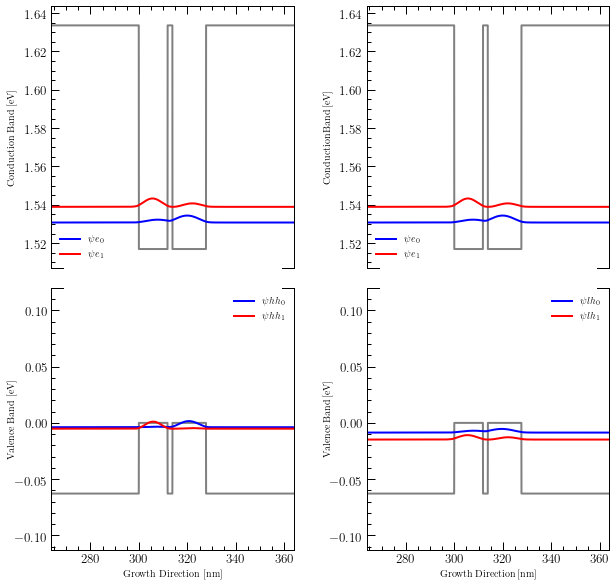

CPU times: user 5.47 s, sys: 781 ms, total: 6.25 s
Wall time: 2.44 s


In [68]:
%%time



class Structure(object): pass
s5 = Structure() # this will be our datastructure

# TEMPERATURE
s5.T = 30 #Kelvin

# Binding Energy
s5.HHBinding =fhh(13.85)*mev
s5.LHBinding =flh(13.85)*mev #meV

# Band Offset ratios
s5.Qc = 0.65
s5.Qv = 0.35

#s0.scheme = 0



# Total subband number to be calculated for electrons
s5.subbands = 2
# APPLIED ELECTRIC FIELD
s5.Fapp = 0e5 # (V/m)

# For 1D, z-axis is choosen
s5.gridfactor = 0.05#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |


s5.material =[
        
             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 13.85,'GaAs'  ,      0,   0, 'n','Well'],
             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]

# s2.material =[
#              [ 10 ,'GaAs'  ,      0,   0, 'n','Well'],
#              [ 300, 'AlGaAs',   0.15,   0, 'n','Barrier']
#               ]






structure5 = s5



nm = 1e-9

# RUN SIMULATION
model5 = solver.StructureFrom(structure5) #

sol5 = solver.Solver(model5).QuantumSolutions(absolute =True,Print=True)
solver.Solver(model5).plotting(sol5,amp=1,eymin =-0.01,eymax=0.01,hymin=-0.05,hymax=0.12)

TrArr5 = np.vstack((sol5.TEHH,sol5.TELH))
np.savetxt(newpath+'/Tr-M4_3140.dat',TrArr5,delimiter=',')
solver.Solver(model5).print_result("M4_3140",sol5)

2

In [94]:
mev = 1e-3
bindingTQWhh = fhh(13.85)*mev
bindingTQWlh = flh(13.85)*mev
bindingnQWhh = fhh(11.87)*mev
bindingnQWlh = flh(11.87)*mev

E1Trhh = sol5.Ee[0]+sol5.Ehh[0] - bindingTQWhh
E1Trlh = sol5.Ee[0]+sol5.Elh[0] - bindingTQWlh
E2Trhh = sol5.Ee[1]+sol5.Ehh[1] - bindingnQWhh
E2Trlh = sol5.Ee[1]+sol5.Elh[1] - bindingnQWlh
#E3Trhh = sol5.Ee[2]+sol5.Ehh[2] - bindingTQWhh
#E3Trlh = sol5.Ee[2]+sol5.Elh[2] - bindingTQWlh

Trans =np.zeros((model5.subbands,2))
Trans[0,0] = E1Trhh
Trans[0,1] = E1Trlh
Trans[1,0] = E2Trhh
Trans[1,1] = E2Trlh
#Trans[2,0] = E3Trhh
#Trans[2,1] = E3Trlh
Trans
print('Experimental H1 %.4f'%1.526549)
print('Experimental L1 %.4f'%1.529649)

for i in range(Trans.shape[0]):
    for j in range(Trans.shape[1]):
            print(r'T %d: %.4f'%(j,Trans[i,j]))

Experimental H1 1.5265
Experimental L1 1.5296
T 0: 1.5276
T 1: 1.5319
T 0: 1.5369
T 1: 1.5461


In [44]:
0%2

0

In [73]:
 # Wave Function electron
#arrays to export

fxmin = -430
fxmax = +470
xmin = int(model5.n_max/2+fxmin)
xmax = int(model5.n_max/2 + fxmax)
amp  = 7
print ('To export data, xmin: %d, xmax:%d'%(sol5.xaxis[xmin]/nm,sol5.xaxis[xmax]/nm))
print('Data dimensions to export %d'%sol5.xaxis[xmin:xmax].shape)
Exp_Bands = np.zeros((sol5.xaxis[xmin:xmax].shape[0],3))
Exp_Psie  = np.zeros((sol5.Psie[xmin:xmax,0].shape[0],sol5.Psie.shape[1]+1))
Exp_Psihh = np.zeros((sol5.Psihh[xmin:xmax,0].shape[0],sol5.Psihh.shape[1]+1))
Exp_Psilh = np.zeros((sol5.Psilh[xmin:xmax,0].shape[0],sol5.Psilh.shape[1]+1))

Exp_Bands[:,0] = sol5.xaxis[xmin:xmax]/nm
Exp_Psie[:,0]  = sol5.xaxis[xmin:xmax]/nm
Exp_Psihh[:,0] = sol5.xaxis[xmin:xmax]/nm
Exp_Psilh[:,0] = sol5.xaxis[xmin:xmax]/nm

Exp_Bands[:,1] = sol5.CB[xmin:xmax]
Exp_Bands[:,2] = sol5.VB[xmin:xmax]

for i in range(1,model5.subbands+1):
    Exp_Psie[:,i]  = amp*sol5.Psie[xmin:xmax,i-1]+sol5.Ee[i-1]
    Exp_Psihh[:,i] = amp*sol5.Psihh[xmin:xmax,i-1]-sol5.Ehh[i-1]
    Exp_Psilh[:,i] = amp*sol5.Psilh[xmin:xmax,i-1]-sol5.Elh[i-1]
    
np.savetxt(newpath+'/Bands-M4_3140.txt',Exp_Bands,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/Psi-Electrons-M4_3140.txt',Exp_Psie,delimiter=',',fmt="%s")
np.savetxt(newpath+'/Psi-HeavyHoles-M4_3140.txt',Exp_Psihh,delimiter=',',fmt="%s")
np.savetxt(newpath+'/Psi-LightHoles-M4_3140.txt',Exp_Psilh,delimiter=',',fmt="%s")


Exp_Psie.shape

To export data, xmin: 270, xmax:360
Data dimensions to export 900


(900, 3)

N. of total data: 877 
X minima: 270
X maxima: 357


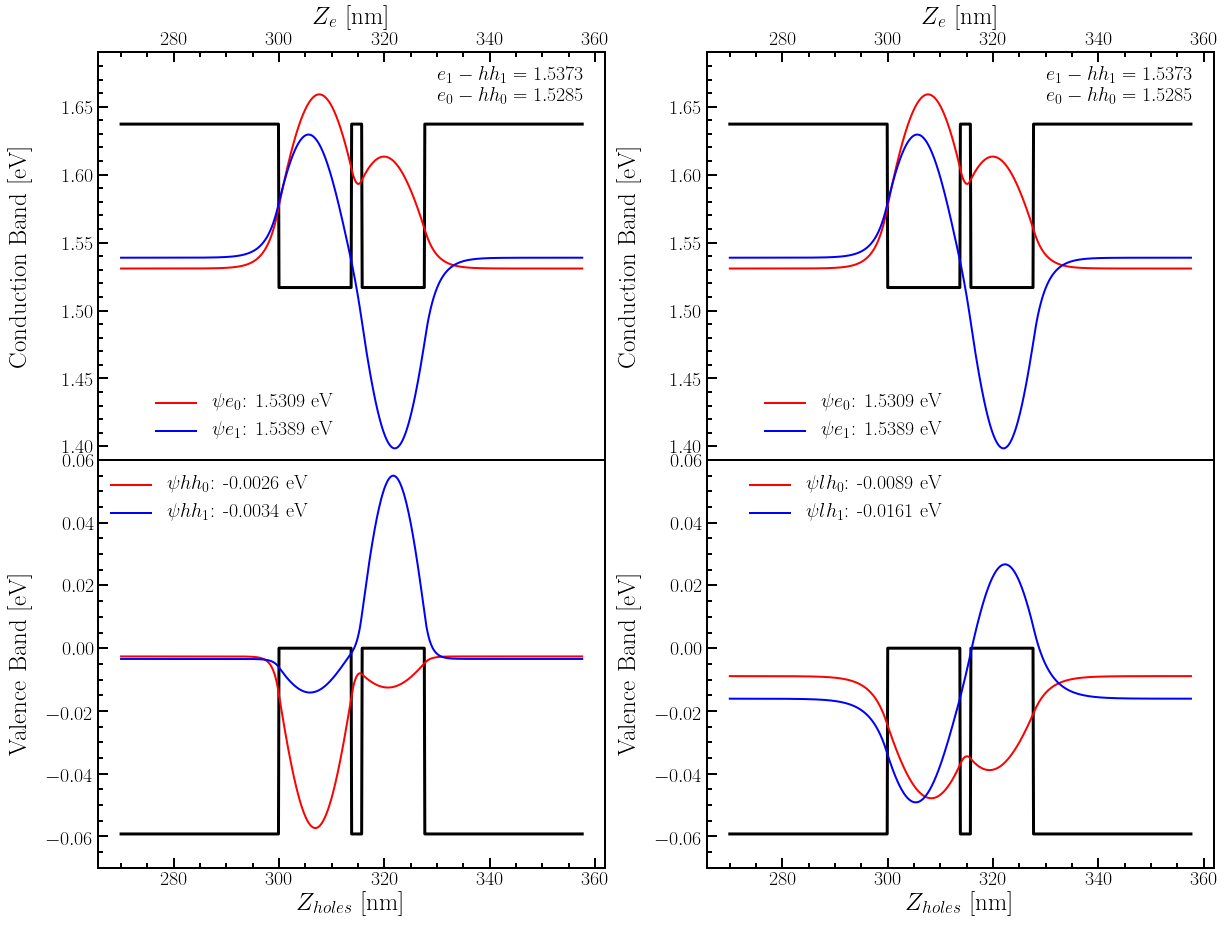

In [128]:
xmin  = 2700
xmax  = model5.n_max-2700
xminv = sol5.xaxis[xmin]/nm
xmaxv = sol5.xaxis[xmax]/nm
ymin  = min(sol5.CB)
ymax  = max(sol5.CB)
print('N. of total data: %d '%(xmax-xmin))
print('X minima: %d'%(sol5.xaxis[xmin]/nm))
print('X maxima: %d'%(sol5.xaxis[xmax]/nm))
amp  = 1.5
amp2 = 0.5
lcolor = ['r','b']
#fig0,ax0= plt.subplots(2,1,figsize=(15,15),sharex=True, sharey=False,gridspec_kw={'hspace': 0})
gs = gridspec.GridSpec(2, 2,height_ratios=[1, 1])
plt.figure(figsize=(20,15))
ax1 = plt.subplot(gs[0, 0]) # row 0, col 0
ax1.plot(sol5.xaxis[xmin:xmax]/nm,sol5.CB[xmin:xmax],'-k',lw=3)
for i in range(model5.subbands):
    ax1.plot(sol5.xaxis[xmin:xmax]/nm,amp*sol5.Psie[i,xmin:xmax]+sol5.Ee[i],
             lw    = 2,
             color = lcolor[i],
             label = '$\psi e_%d$: %.4f eV'%(i,sol5.Ee[i]))
ax1.legend(loc = 1,bbox_to_anchor=(0.5,0.2),fontsize=20)
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.set_xlabel(r'$Z_{e}$ [nm]',fontsize=25)
ax1.set_ylabel('Conduction Band [eV]',fontsize=25)
ax1.yaxis.set_label_coords(-0.13,0.5)
ax1.set_ylim([1.39,1.69])
#ax0[0].set_xlim([250,400])


for j in range(TrArr5.shape[1]):
     ax1.text(xminv+60,ymax+((j+1)*15e-3),r'$e_%d-hh_%d = %.4f$'%(j,j,TrArr5[0,j]),size=20)
            
        
# Heavy Holes
ax2 = plt.subplot(gs[1, 0],sharex=ax1) # row 1, col 0
ax2.plot(sol5.xaxis[xmin:xmax]/nm,sol5.VB[xmin:xmax],'-k',lw=3)
for i in range(model5.subbands):
    ax2.plot(sol5.xaxis[xmin:xmax]/nm,amp2*sol5.Psihh[i,xmin:xmax]-sol5.Ehh[i],
             lw    = 2,
             color = lcolor[i],
             label = '$\psi hh_%d$: %.4f eV'%(i,-sol5.Ehh[i]))
ax2.legend(loc = 1,bbox_to_anchor=(0.45,1),fontsize=20)
ax2.set_xlabel(r'$Z_{holes}$ [nm]',fontsize=25)
ax2.set_ylabel('Valence Band [eV]',fontsize=25)
ax2.set_ylim([-0.07,0.06])
ax2.yaxis.set_label_coords(-0.13,0.5)



ax3= plt.subplot(gs[0, 1]) # row 0, col 1
ax3.plot(sol5.xaxis[xmin:xmax]/nm,sol5.CB[xmin:xmax],'-k',lw=3)
for i in range(model5.subbands):
    ax3.plot(sol5.xaxis[xmin:xmax]/nm,amp*sol5.Psie[i,xmin:xmax]+sol5.Ee[i],
             lw    = 2,
             color = lcolor[i],
             label = '$\psi e_%d$: %.4f eV'%(i,sol5.Ee[i]))
ax3.legend(loc = 1,bbox_to_anchor=(0.5,0.2),fontsize=20)
ax3.xaxis.set_ticks_position('top')
ax3.xaxis.set_label_position('top')
ax3.set_xlabel(r'$Z_{e}$ [nm]',fontsize=25)
ax3.set_ylabel('Conduction Band [eV]',fontsize=25)
ax3.yaxis.set_label_coords(-0.13,0.5)
ax3.set_ylim([1.39,1.69])
ax3.yaxis.set_label_coords(-0.13,0.5)

# Transitions labels . 
for j in range(TrArr5.shape[1]):
     ax3.text(xminv+60,ymax+((j+1)*15e-3),r'$e_%d-hh_%d = %.4f$'%(j,j,TrArr5[0,j]),size=20)
            
            
# Light Holes
ax4 = plt.subplot(gs[1, 1],sharex=ax3) # row 1, col 0
ax4.plot(sol5.xaxis[xmin:xmax]/nm,sol5.VB[xmin:xmax],'-k',lw=3)
for i in range(model5.subbands):
    ax4.plot(sol5.xaxis[xmin:xmax]/nm,amp2*sol5.Psilh[i,xmin:xmax]-sol5.Elh[i],
             lw    = 2,
             color = lcolor[i],
             label = '$\psi lh_%d$: %.4f eV'%(i,-sol5.Elh[i]))
    
ax4.legend(loc = 1,bbox_to_anchor=(0.5,1),fontsize=20)
ax4.set_xlabel(r'$Z_{holes}$ [nm]',fontsize=25)
ax4.set_ylabel('Valence Band [eV]',fontsize=25) 
ax4.set_ylim([-0.07,0.06])
ax4.yaxis.set_label_coords(-0.13,0.5)
         

plt.subplots_adjust(hspace=.0)
#plt.savefig('CQWs-M4_3523.pdf',bbox_inches='tight')

plt.show()
